# Read in 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab 

In [30]:
pylab.rcParams['figure.figsize'] = 8, 6
%matplotlib inline

In [31]:
df = pd.read_csv('./data/data_cleaned/national_level_aggragated_data_from_2000.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
year                                16 non-null int64
enroll                              16 non-null float64
total_revenue                       16 non-null int64
federal_revenue                     16 non-null int64
state_revenue                       16 non-null int64
local_revenue                       16 non-null int64
total_expenditure                   16 non-null int64
instruction_expenditure             16 non-null int64
support_services_expenditure        16 non-null int64
other_expenditure                   16 non-null float64
capital_outlay_expenditure          16 non-null int64
total_known_expenditure             16 non-null float64
unknown_expenditure                 16 non-null float64
rev_per_enroll                      16 non-null float64
population                          16 non-null float64
known_property_crimes               16 non-null float64
teachers_elem_secd_

In [33]:
df.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,pub_high_school_graduates,avg_attendence_elem_secd_schools,pupil_teacher_ratio,high_school_completers_18_to_24,bachelor_completers_over_25,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
0,2000,46432782.0,379602220,26672292,186191266,166738654,386177409,198033848,108952594,17969490.0,...,2.553844e+06,858955.411765,15.631364,0.765741,0.240765,7395.068944,44677.803922,29500.352941,0.039052,104.144917
1,2001,46731110.0,408404990,28625219,200833658,178946113,417014891,212719094,118193372,19202023.0,...,2.618187e+06,874599.843137,15.527110,0.776261,0.245590,7891.482241,44920.666667,30566.568627,0.045340,110.132250
2,2002,47114728.0,426548936,32703469,207374637,186470830,442685445,224842230,125079958,20239470.0,...,2.672161e+06,882693.333333,15.437662,0.786177,0.250233,8315.268641,45455.098039,30970.372549,0.053590,110.130917
3,2003,47603240.0,447668013,36805859,215551319,195310835,462275098,236429160,132947081,20894960.0,...,2.716875e+06,888739.823529,15.359792,0.795489,0.254691,8668.928123,46365.058824,31927.313725,0.055992,103.441000
4,2004,47854683.0,470489151,41300957,218098876,211089318,481241595,245192668,138496636,21542747.0,...,2.753438e+06,888525.647059,15.290270,0.804199,0.258964,9033.744591,47625.294118,33526.725490,0.052152,98.798083


In [34]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

Normalize currency related values to dollar index

In [35]:
currency_related = ['total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll',
       'expenditure_per_pupil', 'gdp_per_capita',
       'income_per_capita']

In [36]:
df[currency_related] = df[currency_related].apply(lambda x: x / df.dollar_index)

# Stats on raw values

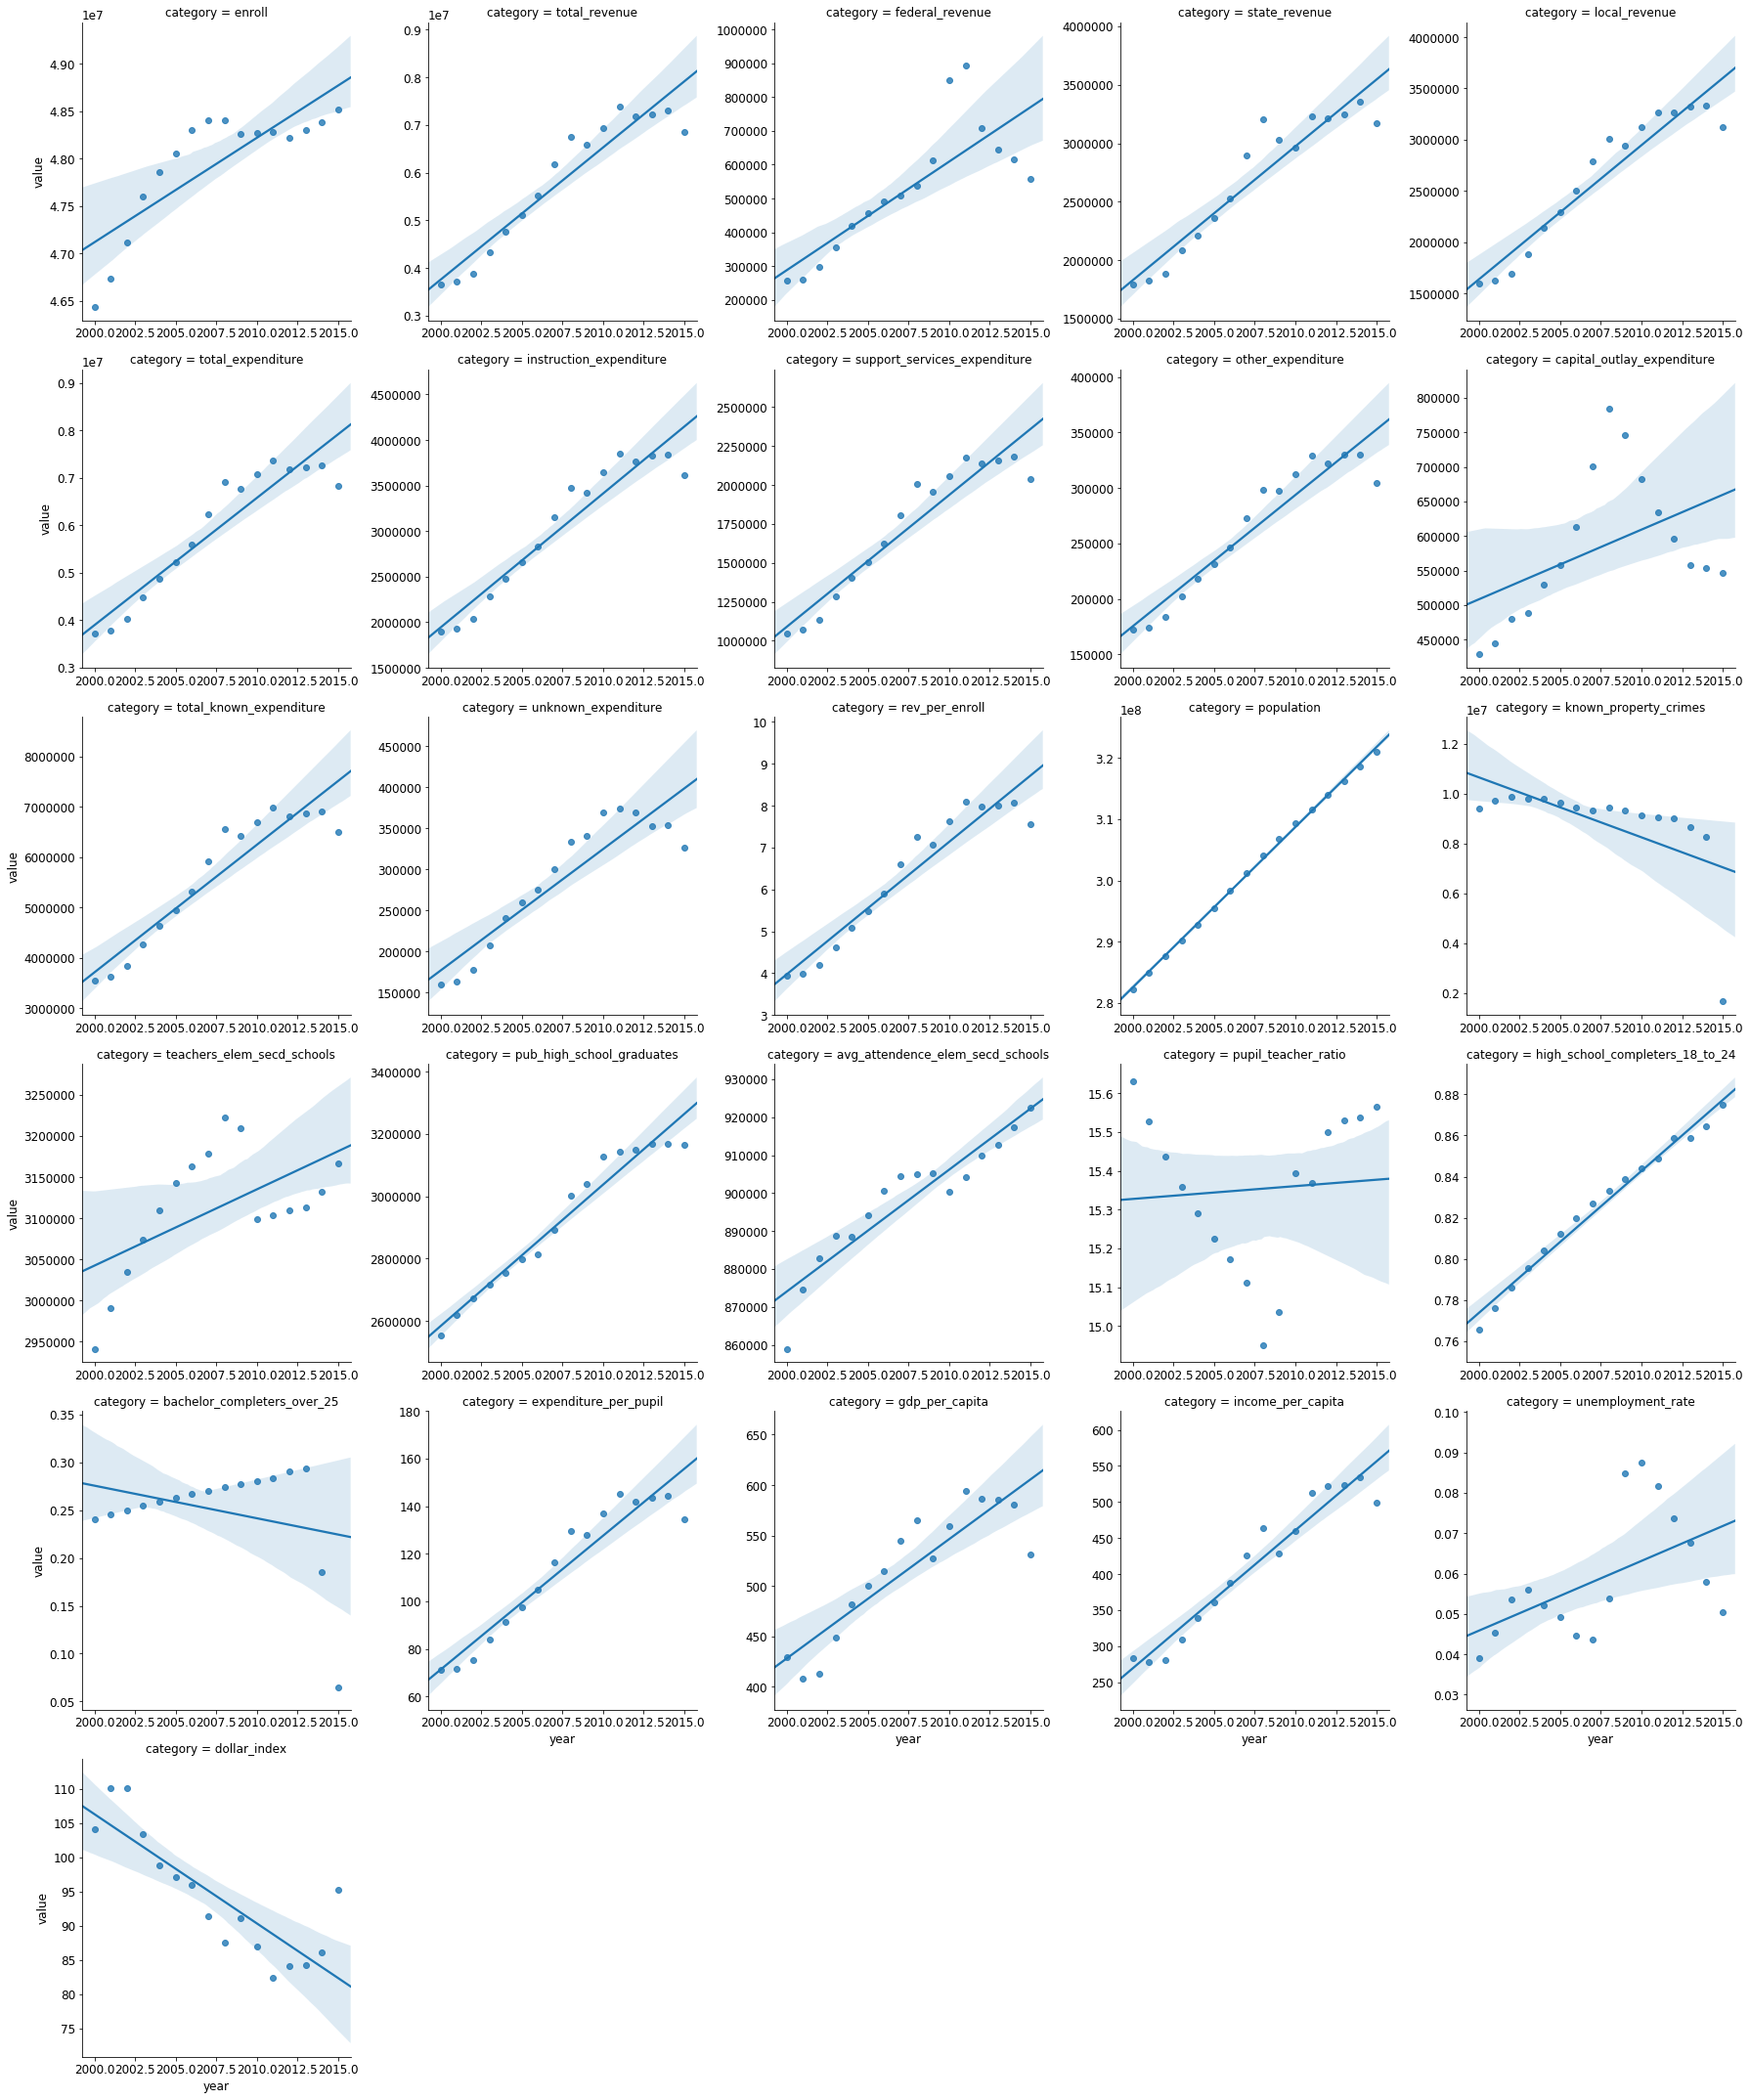

In [37]:
plt.rcParams['font.size'] = 12
sns.lmplot(data = df.melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = df.columns[1:]),
           x = 'year',
           y = 'value',
           col = 'category',
           col_wrap = 5,
           sharex = False,
           sharey = False)

In [39]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

## National level revenue expenditure subcategory correlation

In [40]:
category_expenditures = ['instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure']
category_revenues = ['federal_revenue', 'state_revenue',
       'local_revenue']

corr_category = df.corr()

corr_category.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,pub_high_school_graduates,avg_attendence_elem_secd_schools,pupil_teacher_ratio,high_school_completers_18_to_24,bachelor_completers_over_25,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
year,1.000000,0.820188,0.945034,0.800745,0.944279,0.953113,0.935993,0.954184,0.948942,0.949529,...,0.977406,0.934014,0.077179,0.992493,-0.291583,0.954304,0.881492,0.967030,0.531642,-0.836134
enroll,0.820188,1.000000,0.871022,0.744870,0.873756,0.873439,0.877245,0.860555,0.872814,0.854334,...,0.829067,0.932289,-0.434536,0.878227,-0.060922,0.847228,0.864886,0.827293,0.427953,-0.808926
total_revenue,0.945034,0.871022,1.000000,0.901835,0.992189,0.998805,0.998937,0.998860,0.999604,0.998300,...,0.979070,0.895935,-0.148449,0.958922,-0.029267,0.997837,0.974582,0.984758,0.628450,-0.954332
federal_revenue,0.800745,0.744870,0.901835,1.000000,0.845009,0.890163,0.904775,0.903978,0.898005,0.903819,...,0.889689,0.705731,-0.098715,0.819653,0.161938,0.905968,0.891166,0.856538,0.813107,-0.903745
state_revenue,0.944279,0.873756,0.992189,0.845009,1.000000,0.991807,0.990828,0.989313,0.992460,0.988545,...,0.966664,0.912703,-0.179184,0.957482,-0.075638,0.987351,0.962073,0.982137,0.562383,-0.934736


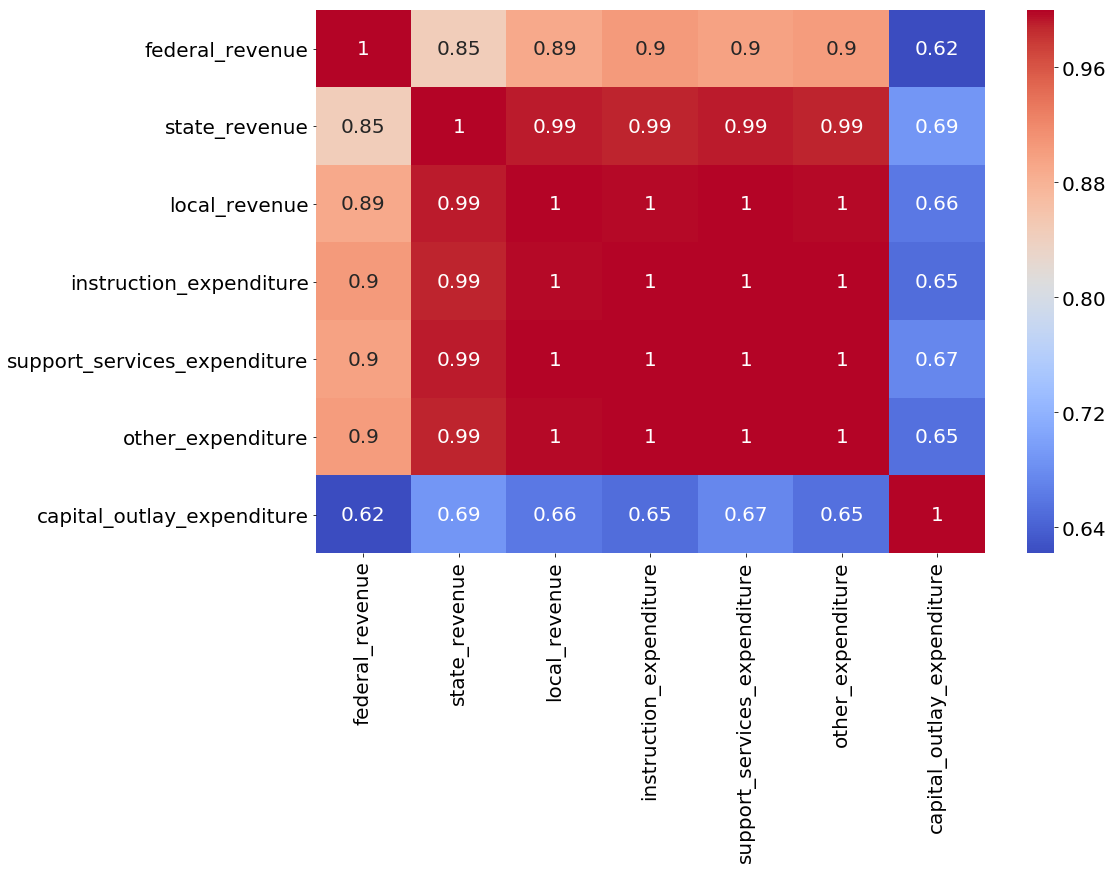

In [41]:
plt.figure(figsize = (15, 10))
plt.rcParams['font.size'] = 20
#sns.heatmap(corr_category.loc[category_revenues, category_expenditures], annot = True)
sns.heatmap(corr_category.loc[category_revenues + category_expenditures, category_revenues + category_expenditures], cmap = 'coolwarm',annot = True)

## National level income outcome correlation

In [43]:
df.columns

Index(['year', 'enroll', 'total_revenue', 'federal_revenue', 'state_revenue',
       'local_revenue', 'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'total_known_expenditure',
       'unknown_expenditure', 'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index'],
      dtype='object')

In [46]:
income_outcome = ['year', 'enroll', 'total_revenue', 'total_expenditure',
                  'rev_per_enroll', 'population',
       'known_property_crimes', 'teachers_elem_secd_schools',
       'pub_high_school_graduates', 'avg_attendence_elem_secd_schools',
       'pupil_teacher_ratio', 'high_school_completers_18_to_24',
       'bachelor_completers_over_25', 'expenditure_per_pupil',
       'gdp_per_capita', 'income_per_capita', 'unemployment_rate',
       'dollar_index']

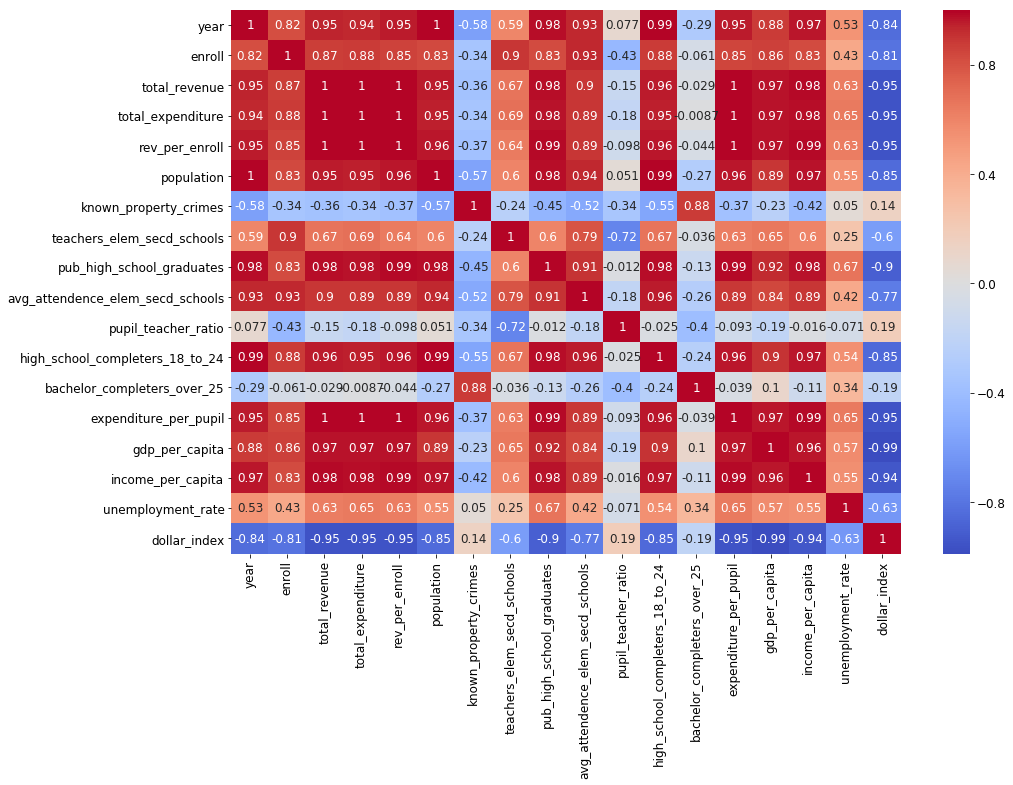

In [48]:
plt.rcParams['font.size'] = 12
covs = df[income_outcome].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(covs, cmap = 'coolwarm', annot=True)

## Revenue subcategory on 2015

In [49]:
category_revenues

['federal_revenue', 'state_revenue', 'local_revenue']

In [50]:

data  = df[['year'] + category_revenues].melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = category_revenues)


In [51]:
data[data.year == 2015]

,year,category,value
15,2015,federal_revenue,5.592150e+05
31,2015,state_revenue,3.174768e+06
47,2015,local_revenue,3.123345e+06


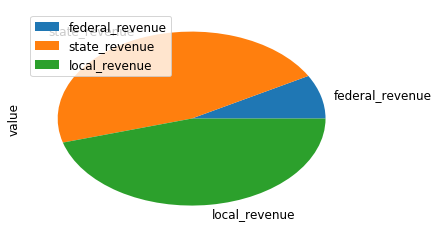

In [52]:
data[data.year == 2015].plot(kind = 'pie', y = 'value', labels = category_revenues)

# Change rate analysis

In [53]:
df_change = df.copy()
df_change[df.columns[1:]] = df_change[df.columns[1:]].pct_change()

df_change.columns = ['year'] + list(df_change.columns[1:] + '_pct_change')

category_revenues_change = [x + '_pct_change' for x in category_revenues]
category_expenditures_change = [x + '_pct_change' for x in category_expenditures]

## change rate revenues 

<Figure size 432x288 with 0 Axes>

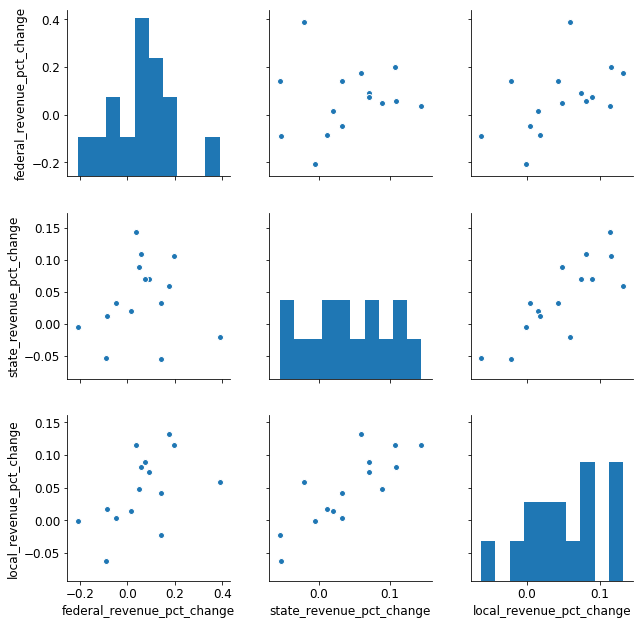

In [54]:
plt.figure()
plt.rcParams['font.size'] = 12
sns.pairplot(df_change[category_revenues_change][1:], size=3)

## change rate expenditures

<Figure size 432x288 with 0 Axes>

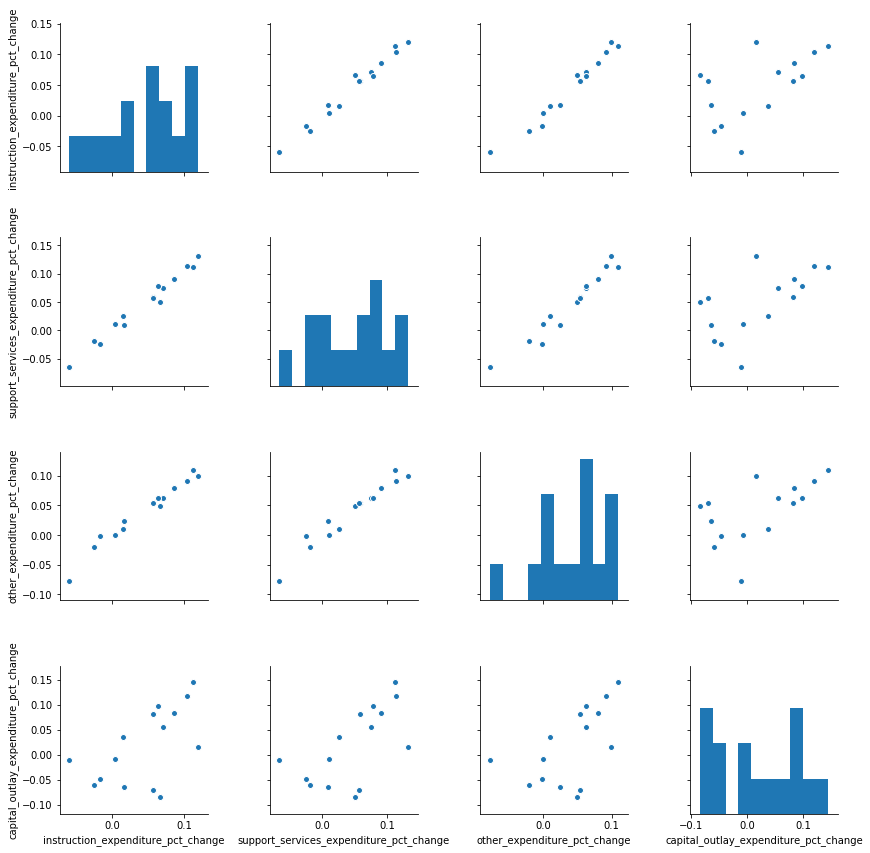

In [55]:
plt.figure()
plt.rcParams['font.size'] = 10
sns.pairplot(df_change[category_expenditures_change][1:], size=3)

## Change rate income outcomes

In [61]:
plt.figure()
plt.rcdefaults()
sns.pairplot(df_change[[x + '_pct_change' for x in income_outcome[1:]]][1:], size = 5)


<Figure size 640x480 with 0 Axes>

In [62]:
df_change.head()

,year,enroll_pct_change,total_revenue_pct_change,federal_revenue_pct_change,state_revenue_pct_change,local_revenue_pct_change,total_expenditure_pct_change,instruction_expenditure_pct_change,support_services_expenditure_pct_change,other_expenditure_pct_change,...,pub_high_school_graduates_pct_change,avg_attendence_elem_secd_schools_pct_change,pupil_teacher_ratio_pct_change,high_school_completers_18_to_24_pct_change,bachelor_completers_over_25_pct_change,expenditure_per_pupil_pct_change,gdp_per_capita_pct_change,income_per_capita_pct_change,unemployment_rate_pct_change,dollar_index_pct_change
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,0.006425,0.017386,0.014874,0.020001,0.014868,0.021147,0.015759,0.025839,0.010496,...,0.025195,0.018213,-0.006670,0.013738,0.020041,0.009113,-0.049225,-0.020187,0.161004,0.057490
2,2002,0.008209,0.044439,0.142484,0.032582,0.042063,0.061571,0.057004,0.058278,0.054041,...,0.020615,0.009254,-0.005761,0.012774,0.018904,0.053715,0.011909,0.013223,0.181959,-0.000012
3,2003,0.010369,0.117387,0.198229,0.106653,0.115147,0.111788,0.119540,0.131638,0.099155,...,0.016733,0.006850,-0.005044,0.011845,0.017817,0.109956,0.085987,0.097571,0.044821,-0.060745
4,2004,0.005282,0.100367,0.174863,0.059368,0.131577,0.089951,0.085802,0.090698,0.079453,...,0.013458,-0.000241,-0.004526,0.010949,0.016777,0.091055,0.075452,0.099444,-0.068579,-0.044885


In [59]:
df_change.columns

Index(['year', 'enroll_pct_change', 'total_revenue_pct_change',
       'federal_revenue_pct_change', 'state_revenue_pct_change',
       'local_revenue_pct_change', 'total_expenditure_pct_change',
       'instruction_expenditure_pct_change',
       'support_services_expenditure_pct_change',
       'other_expenditure_pct_change', 'capital_outlay_expenditure_pct_change',
       'total_known_expenditure_pct_change', 'unknown_expenditure_pct_change',
       'rev_per_enroll_pct_change', 'population_pct_change',
       'known_property_crimes_pct_change',
       'teachers_elem_secd_schools_pct_change',
       'pub_high_school_graduates_pct_change',
       'avg_attendence_elem_secd_schools_pct_change',
       'pupil_teacher_ratio_pct_change',
       'high_school_completers_18_to_24_pct_change',
       'bachelor_completers_over_25_pct_change',
       'expenditure_per_pupil_pct_change', 'gdp_per_capita_pct_change',
       'income_per_capita_pct_change', 'unemployment_rate_pct_change',
       'dol

<Figure size 640x480 with 0 Axes>

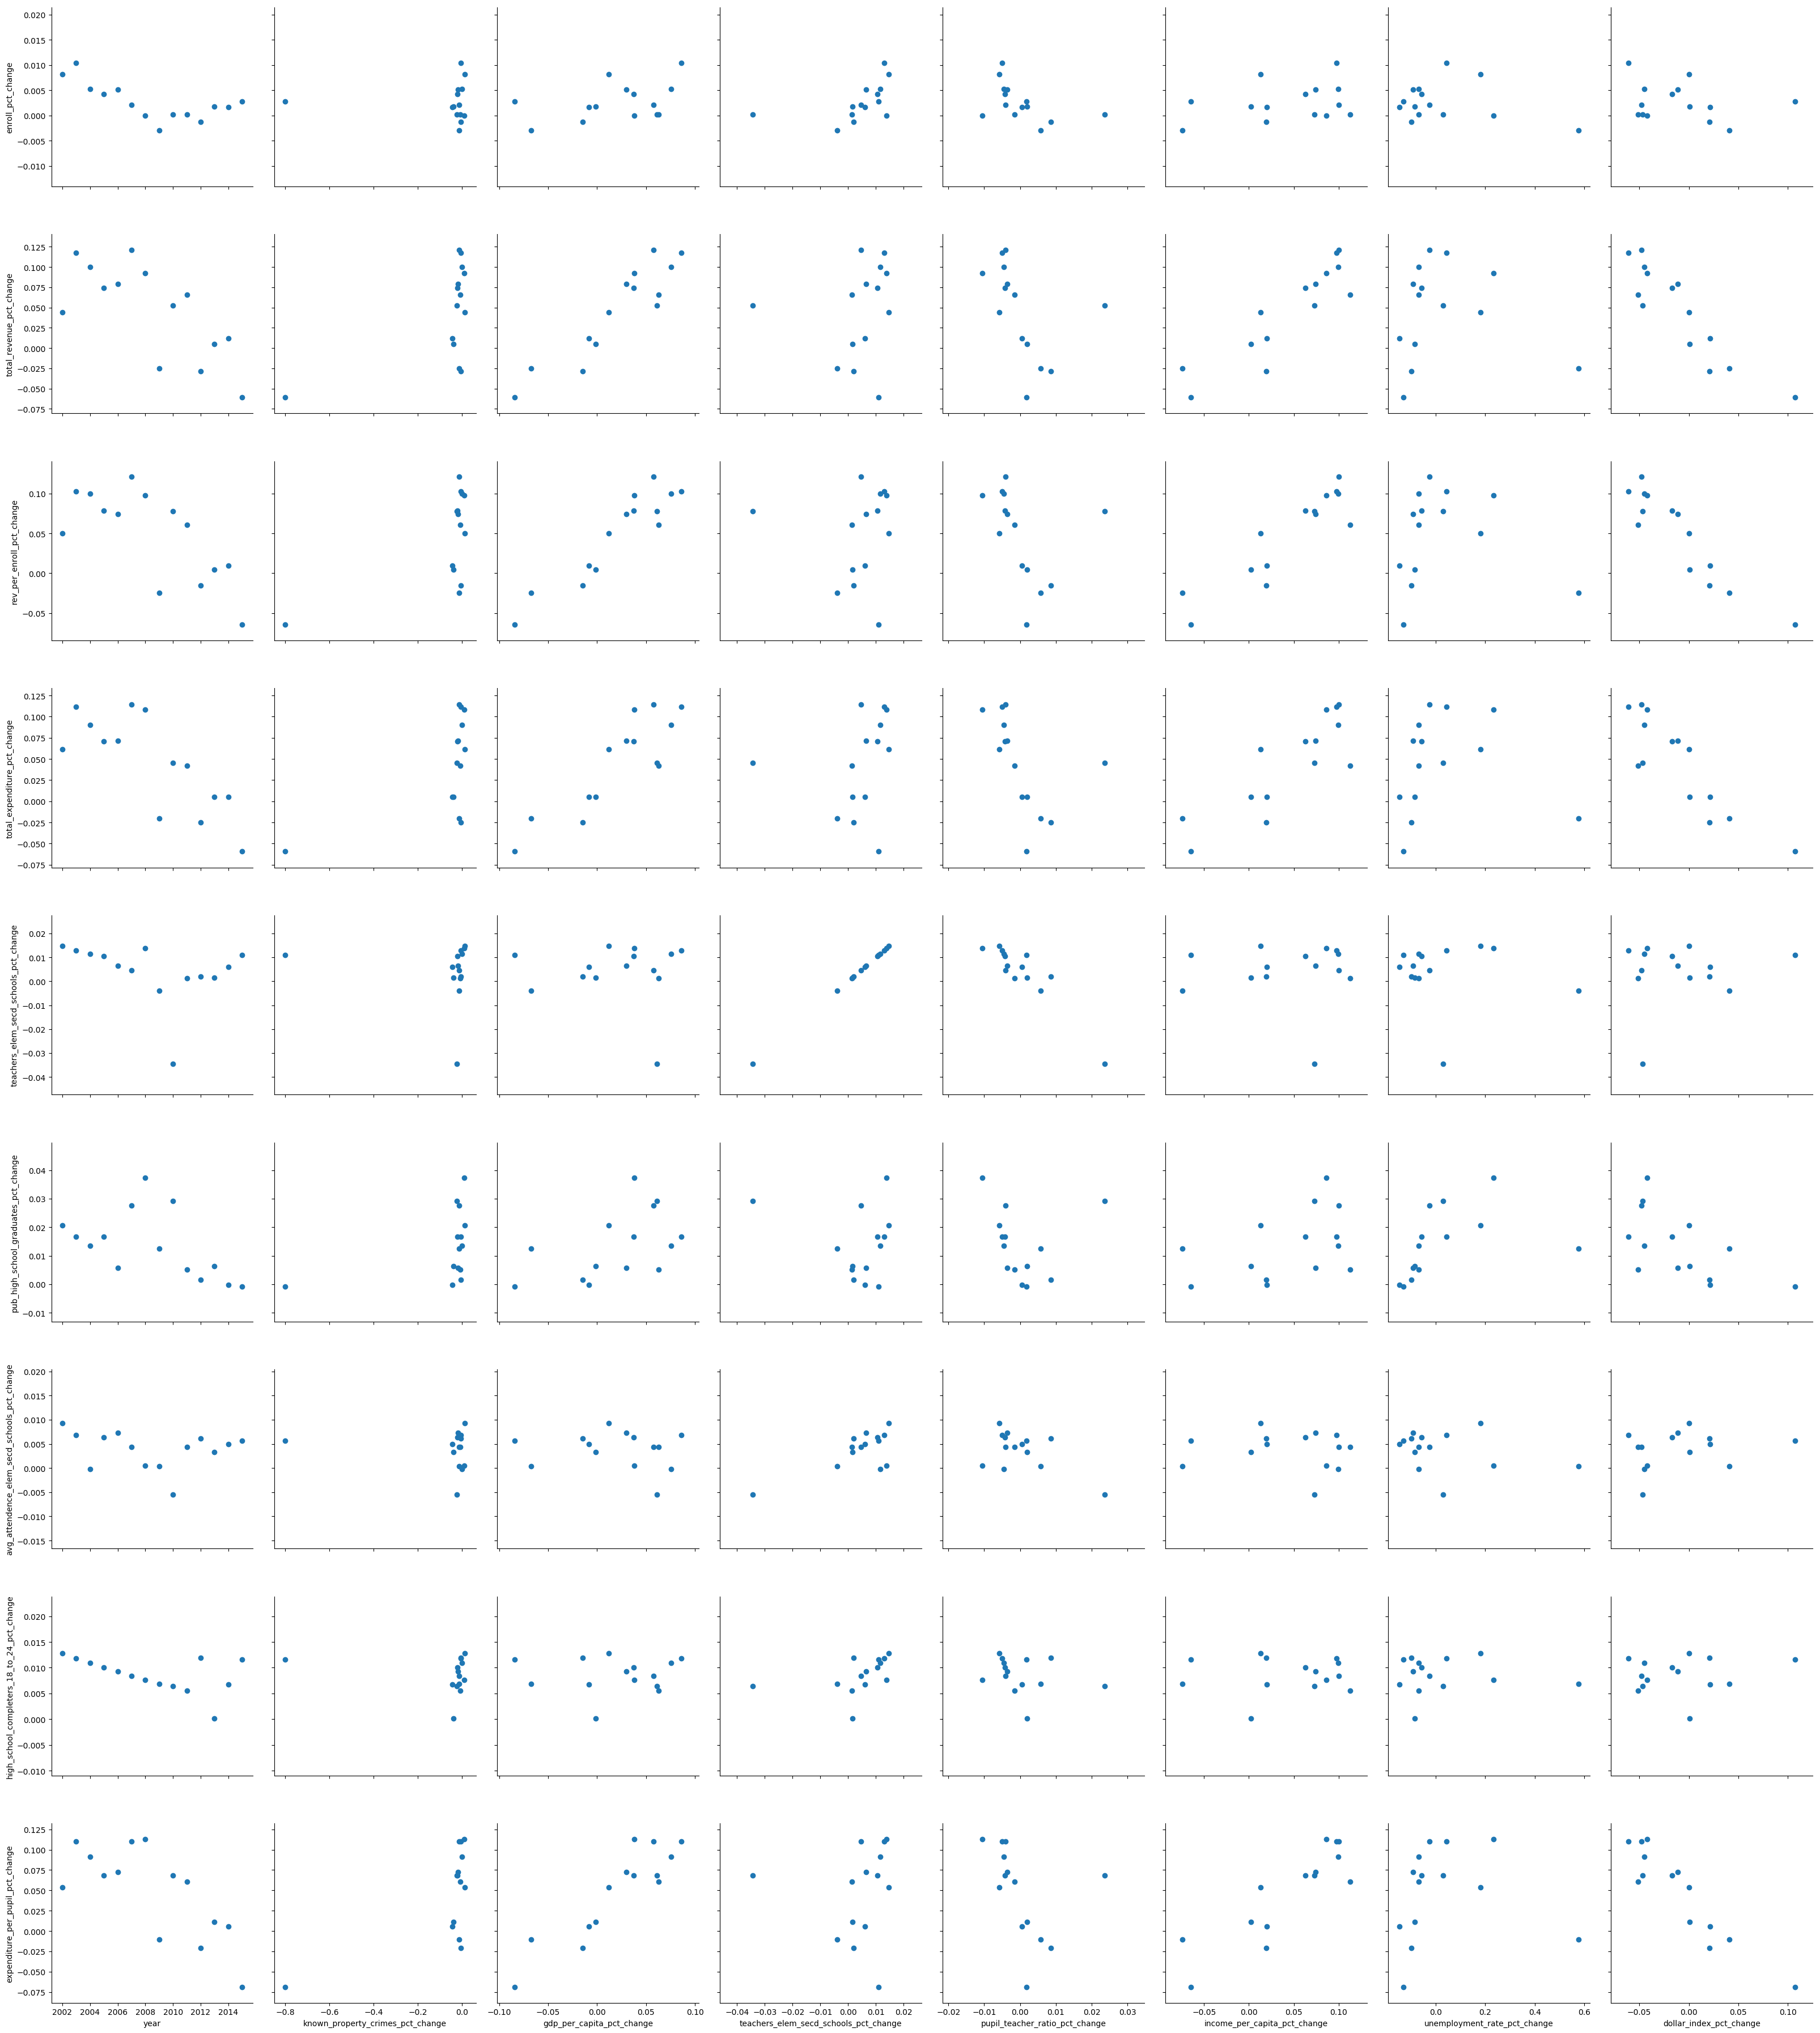

In [65]:
plt.figure()
plt.rcdefaults()
f = sns.PairGrid(data = df_change[2:], 
            x_vars = ['year', 'known_property_crimes_pct_change', 'gdp_per_capita_pct_change',
                      'teachers_elem_secd_schools_pct_change', 'pupil_teacher_ratio_pct_change',
                     'income_per_capita_pct_change', 'unemployment_rate_pct_change','dollar_index_pct_change'],
            y_vars = ['enroll_pct_change', 'total_revenue_pct_change', 'rev_per_enroll_pct_change', 'total_expenditure_pct_change',
                     'teachers_elem_secd_schools_pct_change','pub_high_school_graduates_pct_change', 
                     'avg_attendence_elem_secd_schools_pct_change', 'high_school_completers_18_to_24_pct_change',
                     'expenditure_per_pupil_pct_change'], size= 4)
f.map(plt.scatter)


## Feature extraction

Following factors are linearly changing with gdp_per_capita_pct_change:
+ 'total_revenue_pct_change'
+ 'rev_per_enroll_pct_change'
+ 'total_expenditure_pct_change'  
Lets perform a linear regression

In [294]:
from sklearn.ensemble import RandomForestRegressor

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [396]:
selec_feature = ['gdp_per_capita_pct_change', 'unemployment_rate_pct_change', 'enroll_pct_change', 'dollar_index_pct_change']
X = df_change[selec_feature][1:]
y = df_change.total_revenue_pct_change[1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

0.9282962080844748
{'gdp_per_capita_pct_change': 0.2380450439390214, 'unemployment_rate_pct_change': 0.04554562461202012, 'enroll_pct_change': 0.08038965314036318, 'dollar_index_pct_change': 0.6360196783085954}


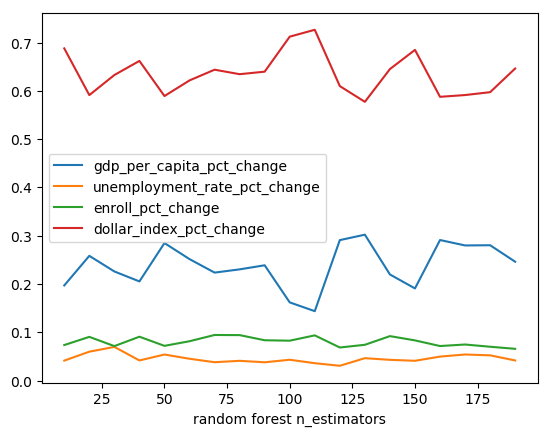

In [397]:
feature_score = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    tree = RandomForestRegressor(n_estimators=40).fit(X,y)
    feature_score.append(tree.feature_importances_)

print(tree.score(X,y))
print(dict(zip(selec_feature, [x.mean() for x in np.array(feature_score).T])))
plt.plot(estimators, feature_score)
plt.xlabel('random forest n_estimators')
plt.legend(selec_feature)


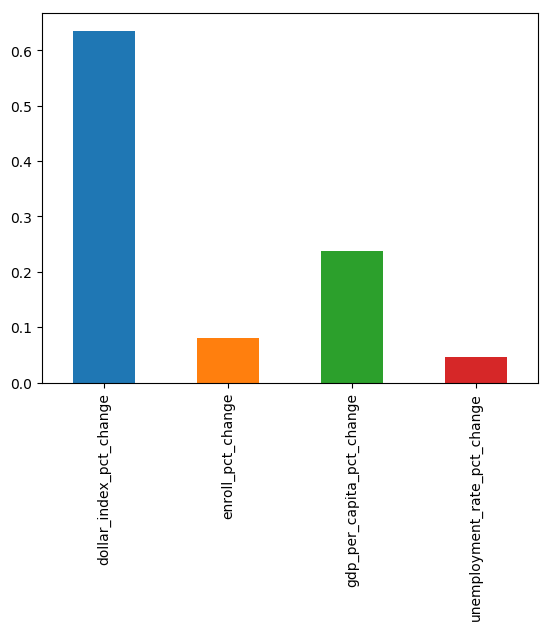

In [398]:
pd.Series(dict(zip(selec_feature, [x.mean() for x in np.array(feature_score).T]))).plot(kind= 'bar')

## Linear regression on selected features

In [399]:
selec_main_feature = ['gdp_per_capita_pct_change', 'dollar_index_pct_change']
#selec_main_feature = selec_feature
selec_X = df_change[selec_main_feature][1:]
lg = LinearRegression()
lg.fit(selec_X,y).score(selec_X,y)

0.7160675106176586

In [400]:
lg.coef_, lg.intercept_

(array([ 0.08452938, -0.90158376]), 0.04767674336303142)

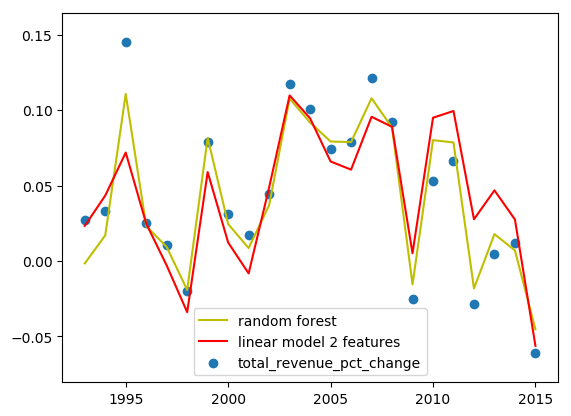

In [401]:
tselec_X = np.linspace(1992,2015, 20)
plt.scatter(df_change.year[1:], y)
plt.plot(df_change.year[1:], tree.predict(X), 'y-', label = 'random forest')
plt.plot(df_change.year, 0.0477 + 0.085 * df_change.gdp_per_capita_pct_change - 0.9 * df_change.dollar_index_pct_change, 'r-', label = 'linear model 2 features')
plt.legend()

In [409]:
X_train, X_test, y_train, y_test = train_test_split(selec_X, y, test_size = 0.2, random_state = 10)

In [410]:
lg = LinearRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.5460908436740599

In [411]:
print(lg.predict(X_test),'\n', y_test.values)

[-0.03571108  0.03215225  0.00879995  0.06275305  0.08955384] 
 [-0.02017524  0.03300626  0.0310202   0.14524537  0.10036746]


In [412]:

from sklearn.metrics import mean_squared_error, r2_score

In [413]:
r2_score(y_test, lg.predict(X_test))

0.5460908436740599

In [414]:
mean_squared_error(y_test, lg.predict(X_test))

0.001531549801698524

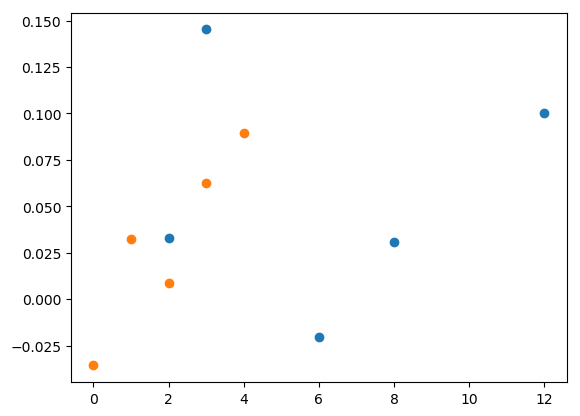

In [418]:
plt.plot( y_test, 'o')
plt.plot(lg.predict(X_test),'o')

## change rate plot VS year

<Figure size 720x576 with 0 Axes>

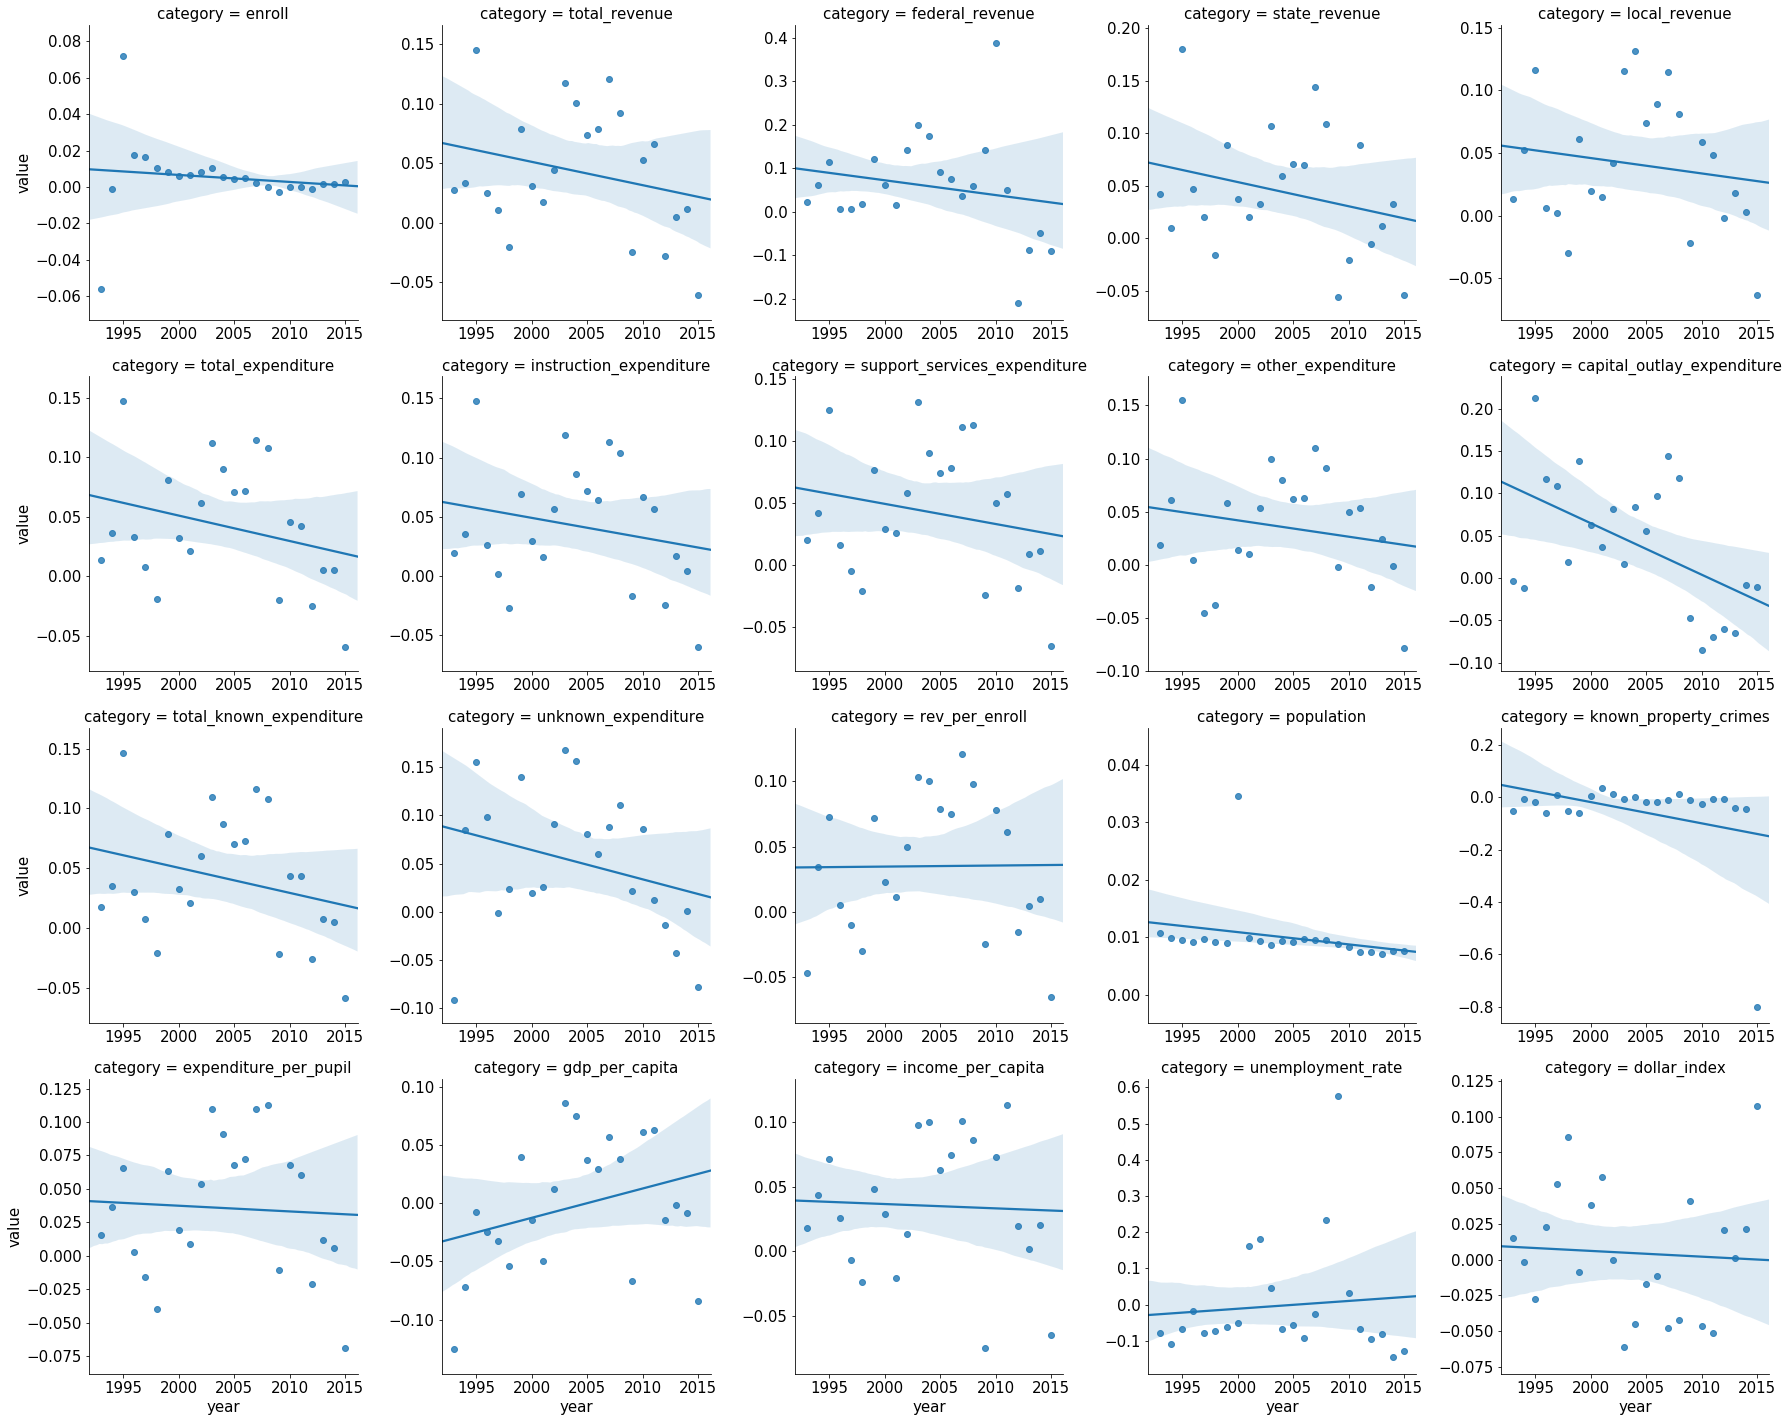

In [97]:
plt.figure(figsize = (10, 8))
sns.lmplot(data = df_change.melt(id_vars = 'year', value_name = 'value', var_name = 'category',  value_vars = df.columns[1:]),
           x = 'year',
           y = 'value',
           col = 'category',
           col_wrap = 5,
           sharex = False,
           sharey = False)

## Correlations on revenue and expenditure

In [105]:
category_expenditures = ['instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure']
category_revenues = ['federal_revenue', 'state_revenue',
       'local_revenue']

corr_category_change = df_change.corr()

corr_category_change.head()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,total_known_expenditure,unknown_expenditure,rev_per_enroll,population,known_property_crimes,expenditure_per_pupil,gdp_per_capita,income_per_capita,unemployment_rate,dollar_index
year,1.000000,-0.130102,-0.252119,-0.197324,-0.266079,-0.160859,-0.279728,-0.217933,-0.210400,-0.191499,...,-0.276270,-0.285311,0.010463,-0.267388,-0.333375,-0.058064,0.304363,-0.043734,0.091176,-0.060152
enroll,-0.130102,1.000000,0.353639,0.121541,0.395637,0.284446,0.407419,0.373178,0.302594,0.333552,...,0.395664,0.542379,0.302382,-0.006940,0.044820,0.117584,0.286713,0.135325,-0.050920,-0.080439
total_revenue,-0.252119,0.353639,1.000000,0.534045,0.906369,0.960240,0.985449,0.986409,0.982335,0.943682,...,0.986995,0.781727,0.907793,0.011318,0.444714,0.927095,0.701474,0.865713,-0.059062,-0.844416
federal_revenue,-0.197324,0.121541,0.534045,1.000000,0.179599,0.528879,0.524852,0.567618,0.529475,0.518129,...,0.511105,0.621336,0.572432,0.055010,0.287072,0.585526,0.466375,0.402424,0.332350,-0.527326
state_revenue,-0.266079,0.395637,0.906369,0.179599,1.000000,0.803241,0.896737,0.876699,0.876153,0.832044,...,0.905664,0.604480,0.737618,0.026316,0.366318,0.762066,0.548636,0.771910,-0.181491,-0.683993


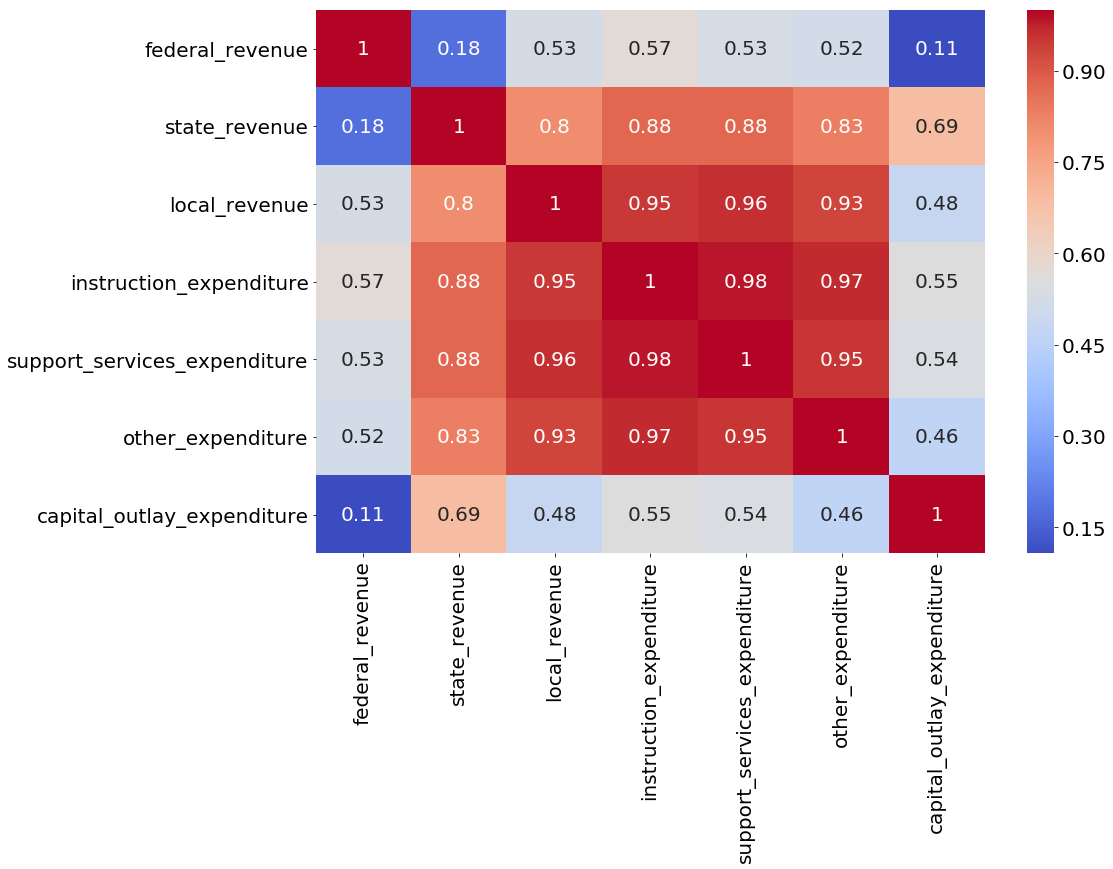

In [112]:
plt.figure(figsize = (15, 10))
plt.rcParams['font.size'] = 20
#sns.heatmap(corr_category.loc[category_revenues, category_expenditures], annot = True)
sns.heatmap(corr_category_change.loc[category_revenues + category_expenditures, category_revenues + category_expenditures], cmap = 'coolwarm',annot = True)

## correlations on income and outcomes

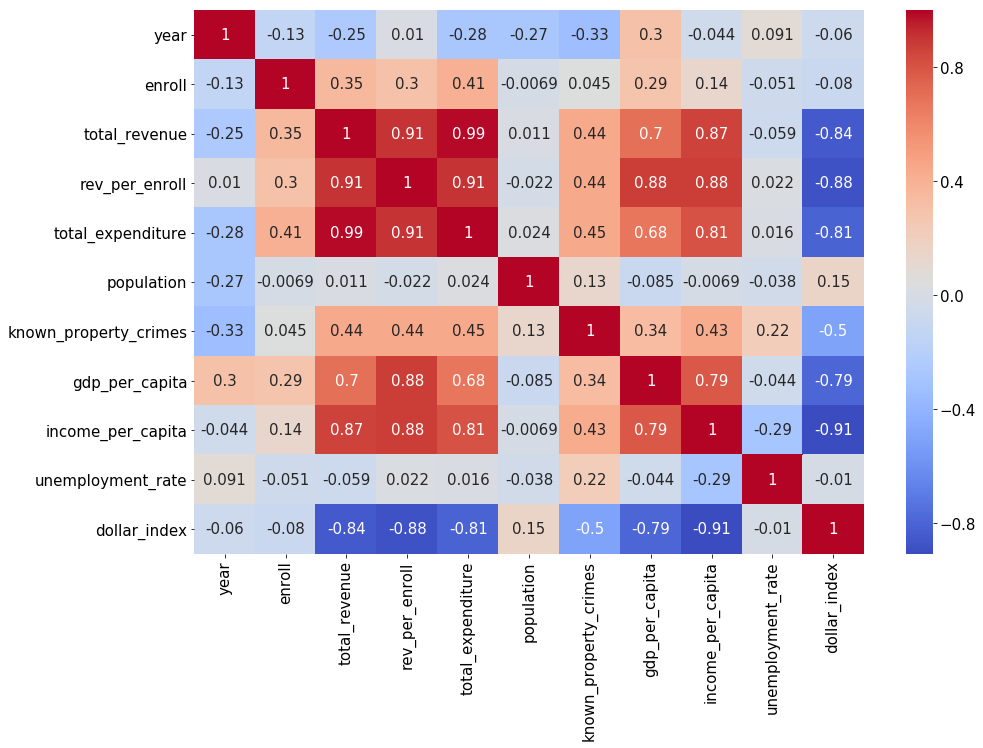

In [115]:
plt.rcParams['font.size'] = 15
covs_change = df_change[['year', 'enroll', 'total_revenue', 'rev_per_enroll', 'total_expenditure','population',
        'known_property_crimes',  'gdp_per_capita', 'income_per_capita', 'unemployment_rate', 
        'dollar_index']].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(covs_change, cmap = 'coolwarm', annot=True)

# PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
#new_feature = pca.fit_transform(df.drop('year', axis = 1))
new_feature = pca.fit_transform(df)

In [11]:
pca.explained_variance_ratio_

array([0.99713617, 0.00166225])

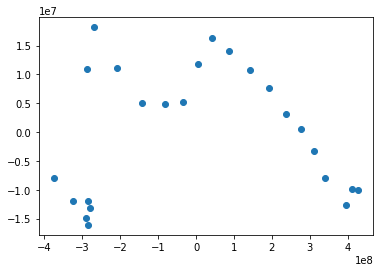

In [13]:
plt.plot(new_feature[:,0], new_feature[:,1], 'o')

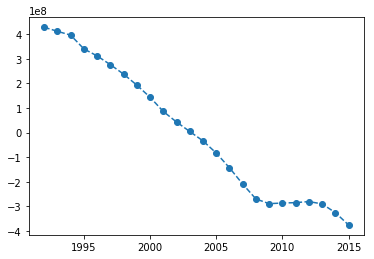

In [39]:
plt.plot(df.year, new_feature[:,0], 'o--')